Example 1: Basic Error Handling
Example failed with unexpected error: 'z'



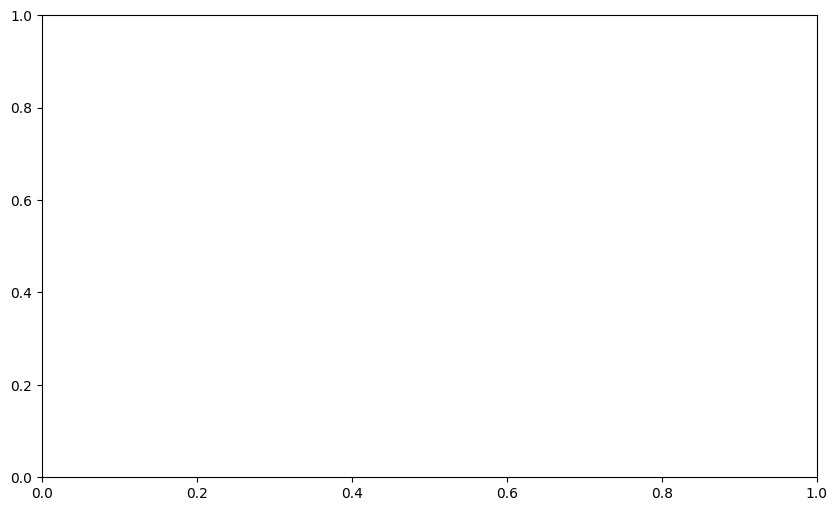

In [87]:
"""
Examples demonstrating error handling in LightenPlot.
"""

import lightenplot as lp
import pandas as pd
import numpy as np
from errors import (
    ColumnNotFoundError,
    EmptyDataError,
    InvalidParameterError,
    DataValidator,
    plot_context,
    suppress_warnings
)


def example_1_basic_error_handling():
    """Example 1: Basic error handling with try-except."""
    print("=" * 70)
    print("Example 1: Basic Error Handling")
    print("=" * 70)
    
    data = pd.DataFrame({
        'x': [1, 2, 3],
        'y': [4, 5, 6]
    })
    
    # Try to use a non-existent column
    try:
        plot = lp.scatter(data, x='x', y='z')
        raise ColumnNotFoundError
    except ColumnNotFoundError as e:
        print(f"Error caught: {e}")
        print()



try:
    example_1_basic_error_handling()
except Exception as e:
     print(f"Example failed with unexpected error: {e}")
     print()


Example 2: Empty Data Handling
Example failed with unexpected error: 'y'



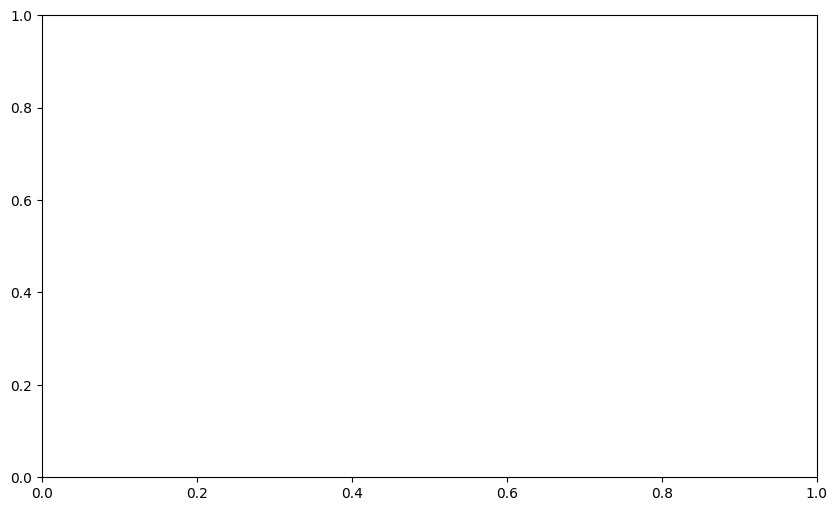

In [88]:
def example_2_empty_data_handling():
    """Example 2: Handling empty data."""
    print("=" * 70)
    print("Example 2: Empty Data Handling")
    print("=" * 70)
    
    empty_df = pd.DataFrame({'x': [1,2,3]})
    
    try:
        plot = lp.scatter(empty_df, x='x', y='y')
    except EmptyDataError as e:
        print(f"Error caught: {e}")
        print()


try:
    example_2_empty_data_handling()
except Exception as e:
     print(f"Example failed with unexpected error: {e}")
     print()



Example 3: Parameter Validation
Example failed with unexpected error: alpha (1.5) is outside 0-1 range



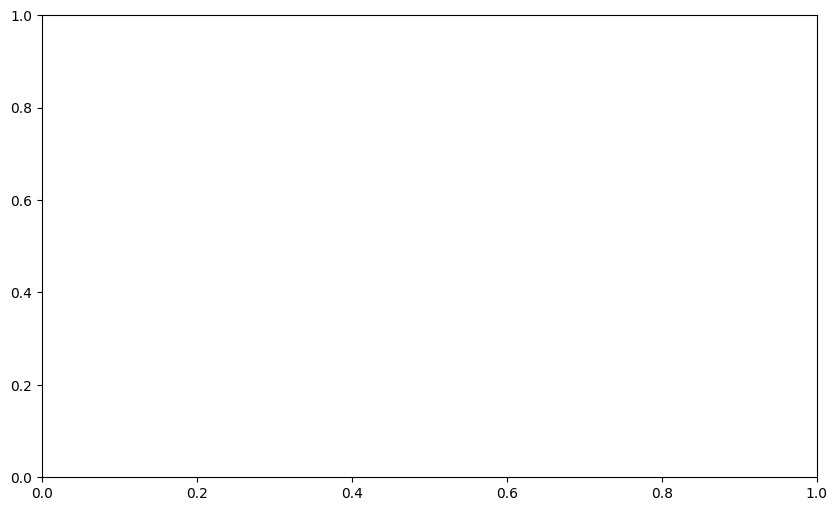

In [89]:
def example_3_parameter_validation():
    """Example 3: Parameter validation."""
    print("=" * 70)
    print("Example 3: Parameter Validation")
    print("=" * 70)
    
    data = pd.DataFrame({
        'x': [1, 2, 3],
        'y': [4, 5, 6]
    })
    
    try:
        # Invalid alpha value (must be 0-1)
        plot = lp.scatter(data, x='x', y='y', alpha=1.5)
    except InvalidParameterError as e:
        print(f"Error caught: {e}")
        print()


try:
    example_3_parameter_validation()
except Exception as e:
     print(f"Example failed with unexpected error: {e}")
     print()


Example 4: Using DataValidator
All validations passed!



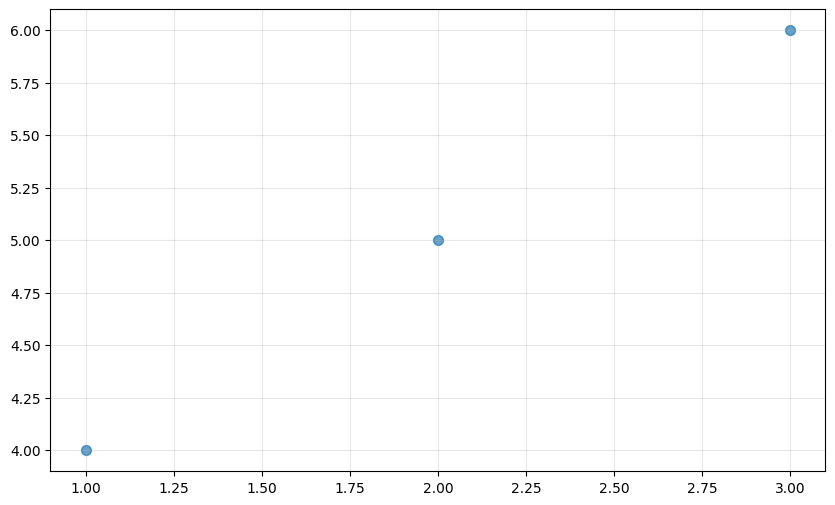

In [90]:

def example_4_data_validator():
    """Example 4: Using DataValidator for comprehensive validation."""
    print("=" * 70)
    print("Example 4: Using DataValidator")
    print("=" * 70)
    
    data = pd.DataFrame({
        'x': [1, 2, 3],
        'y': [4, 5, 6],
        'category': ['A', 'B', 'C']
    })
    
    # Validate data before plotting
    validator = DataValidator(data)
    validator.check_not_empty()
    validator.check_columns(['x', 'y'])
    validator.check_numeric(['x', 'y'])
    
    if validator.is_valid():
        print("All validations passed!")
        plot = lp.scatter(data, x='x', y='y')
        # plot.show()
    else:
        print("Validation errors found:")
        for error in validator.get_errors():
            print(f"  - {error}")
    print()



try:
    example_4_data_validator()
except Exception as e:
     print(f"Example failed with unexpected error: {e}")
     print()


In [91]:
def example_5_context_manager():
    """Example 5: Using context manager for safe plotting."""
    print("=" * 70)
    print("Example 5: Context Manager for Safe Plotting")
    print("=" * 70)
    
    data = pd.DataFrame({
        'x': [1, 2, 3],
        'y': [4, 5, 6]
    })
    
    # Use context manager for automatic cleanup on error
    try:
        with plot_context(cleanup_on_error=True):
            plot = lp.scatter(data, x='x', y='wrong_column')
    except ColumnNotFoundError as e:
        print(f"Error caught and figures cleaned up: {e}")
    print()


try:
    example_5_context_manager()
except Exception as e:
     print(f"Example failed with unexpected error: {e}")
     print()

Example 5: Context Manager for Safe Plotting
Example failed with unexpected error: 'wrong_column'



Example 6: Suppressing Warnings
Plot created with warnings suppressed



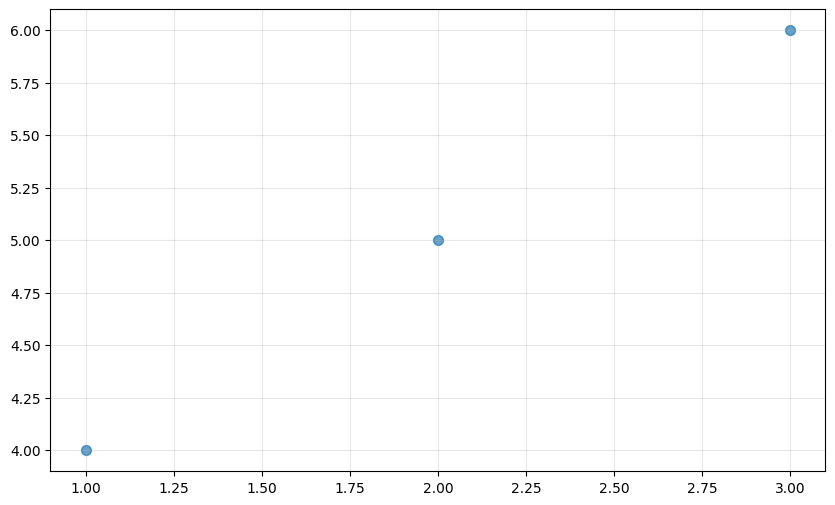

In [92]:
def example_6_suppress_warnings():
    """Example 6: Suppressing warnings during plotting."""
    print("=" * 70)
    print("Example 6: Suppressing Warnings")
    print("=" * 70)
    
    data = pd.DataFrame({
        'x': [1, 2, 3],
        'y': [4, 5, 6]
    })
    
    # Suppress matplotlib warnings
    with suppress_warnings():
        plot = lp.scatter(data, x='x', y='y')
        print("Plot created with warnings suppressed")
    print()


try:
    example_6_suppress_warnings()
except Exception as e:
     print(f"Example failed with unexpected error: {e}")
     print()

Example 7: Custom Validation
Custom validation passed!



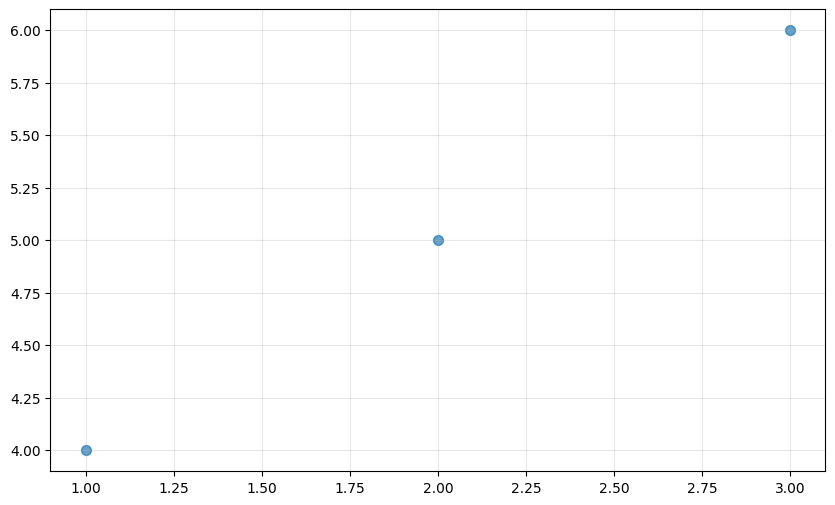

In [93]:
def example_7_custom_validation():
    """Example 7: Custom validation in user code."""
    print("=" * 70)
    print("Example 7: Custom Validation")
    print("=" * 70)
    
    data = pd.DataFrame({
        'x': [1, 2, 3],
        'y': [4, 5, 6]
    })
    
    # Custom validation function
    def validate_plot_data(df, x_col, y_col):
        """Custom validation for plot data."""
        validator = DataValidator(df)
        validator.check_not_empty()
        validator.check_columns([x_col, y_col])
        validator.check_numeric([x_col, y_col])
        
        # Custom check: ensure positive values
        if (df[x_col] < 0).any() or (df[y_col] < 0).any():
            raise InvalidParameterError(
                "Data contains negative values",
                "This plot requires positive values only"
            )
        
        validator.validate()
    
    try:
        validate_plot_data(data, 'x', 'y')
        print("Custom validation passed!")
        plot = lp.scatter(data, x='x', y='y')
    except Exception as e:
        print(f"Validation failed: {e}")
    print()


try:
    example_7_custom_validation()
except Exception as e:
     print(f"Example failed with unexpected error: {e}")
     print()

Example 8: Graceful Degradation
Example failed with unexpected error: 'time'



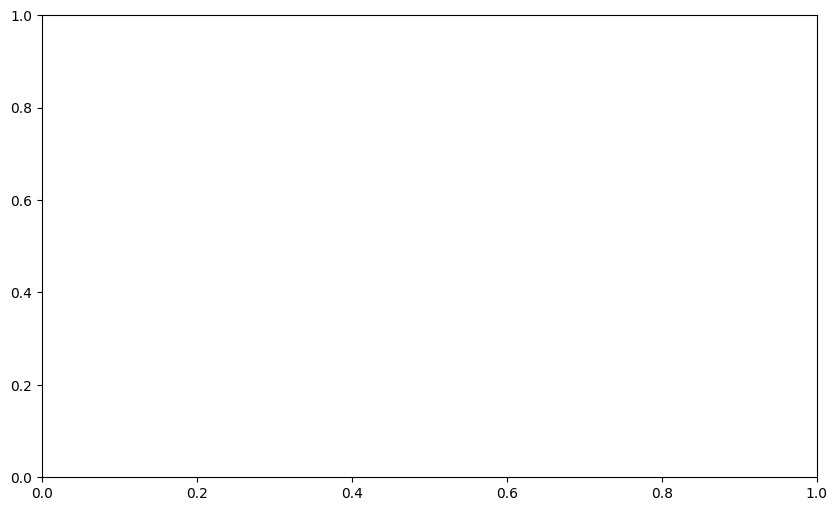

In [94]:
def example_8_graceful_degradation():
    """Example 8: Graceful degradation with fallback."""
    print("=" * 70)
    print("Example 8: Graceful Degradation")
    print("=" * 70)
    
    data = pd.DataFrame({
        'x': [1, 2, 3],
        'y': [4, 5, 6]
    })
    
    # Try preferred column, fall back to alternative
    try:
        plot = lp.scatter(data, x='time', y='value')
    except ColumnNotFoundError:
        print("Preferred columns not found, using fallback...")
        plot = lp.scatter(data, x='x', y='y')
        print("Plot created with fallback columns")
    print()


try:
    example_8_graceful_degradation()
except Exception as e:
     print(f"Example failed with unexpected error: {e}")
     print()

Example 9: Error Reporting
LightenPlot Error Report
Error Type: KeyError
Message: 'x'



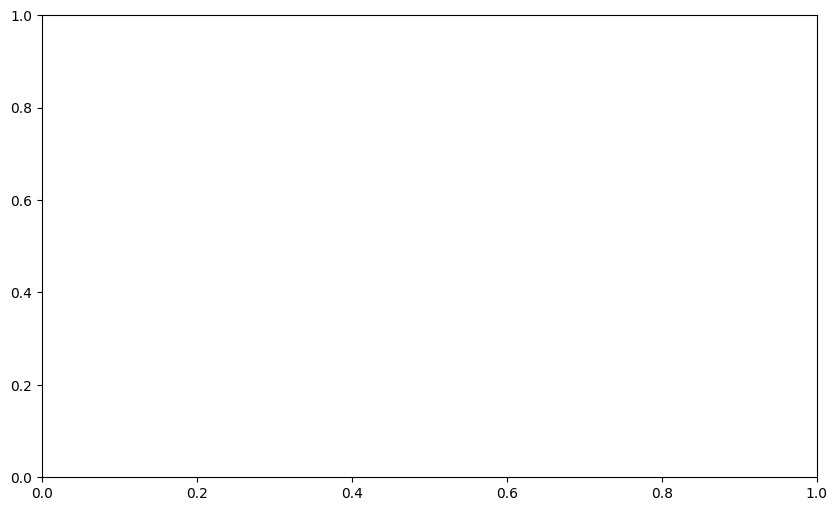

In [95]:
def example_9_error_reporting():
    """Example 9: Creating error reports."""
    print("=" * 70)
    print("Example 9: Error Reporting")
    print("=" * 70)
    
    from errors import create_error_report
    
    data = pd.DataFrame()
    
    try:
        plot = lp.scatter(data, x='x', y='y')
    except Exception as e:
        report = create_error_report(e, include_traceback=False)
        print(report)
    print()


try:
    example_9_error_reporting()
except Exception as e:
     print(f"Example failed with unexpected error: {e}")
     print()

Example 10: Chained Validation
All chained validations passed!



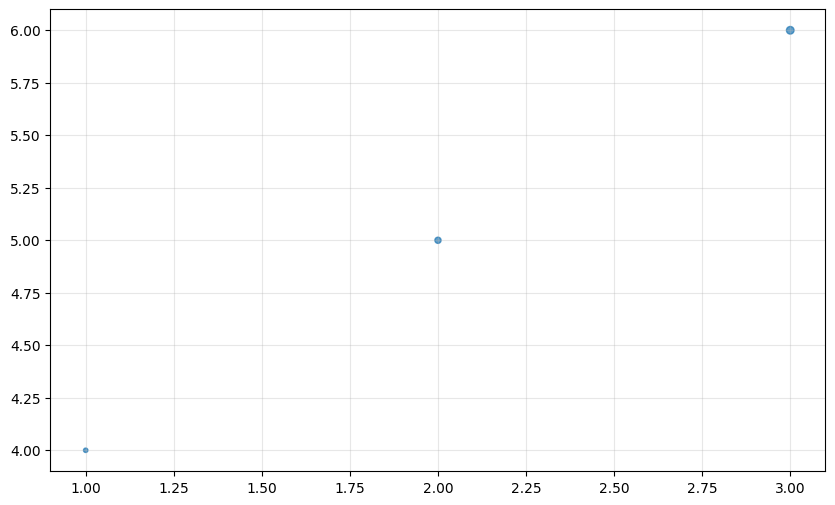

In [96]:
def example_10_chained_validation():
    """Example 10: Chained validation with DataValidator."""
    print("=" * 70)
    print("Example 10: Chained Validation")
    print("=" * 70)
    
    data = pd.DataFrame({
        'x': [1, 2, 3],
        'y': [4, 5, 6],
        'size': [10, 20, 30]
    })
    
    # Chain multiple validations
    try:
        validator = DataValidator(data)
        validator \
            .check_not_empty() \
            .check_columns(['x', 'y', 'size']) \
            .check_numeric(['x', 'y', 'size']) \
            .validate()
        
        print("All chained validations passed!")
        plot = lp.scatter(data, x='x', y='y', size='size')
    except Exception as e:
        print(f"Validation failed: {e}")
    print()


try:
    example_10_chained_validation()
except Exception as e:
     print(f"Example failed with unexpected error: {e}")
     print()

--- Testing Empty Data Handling ---
Failed. Caught raw KeyError instead: 'speed'


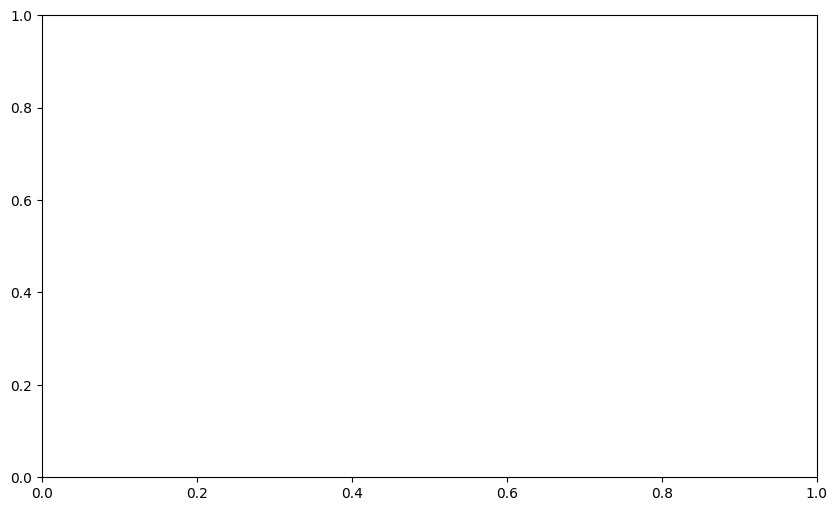

In [97]:
import pandas as pd
import lightenplot as lp
from errors import EmptyDataError, LightenPlotError

def example_empty_data():
    print("--- Testing Empty Data Handling ---")
    
    # Create empty DataFrame
    empty_df = pd.DataFrame()

    try:
        # This will now hit the validator in plots.py BEFORE pandas raises KeyError
        lp.scatter(empty_df, x='speed', y='mpg')
        
    except EmptyDataError as e:
        print(f"Success! Caught expected error.")
        print(f"Error Message: {e}")
        # Because LightenPlotError adds a suggestion, this prints:
        # "Cannot create plot with empty data. 
        #  Suggestion: Ensure your data contains at least one row/element"

    except KeyError as e:
        print(f"Failed. Caught raw KeyError instead: {e}")

example_empty_data()



LightenPlot Error Handling Examples

Example 1: Basic Error Handling
Example failed with unexpected error: 'z'

Example 2: Empty Data Handling
Example failed with unexpected error: 'y'

Example 3: Parameter Validation
Example failed with unexpected error: alpha (1.5) is outside 0-1 range

Example 4: Using DataValidator
All validations passed!

Example 5: Context Manager for Safe Plotting
Example failed with unexpected error: 'wrong_column'

Example 6: Suppressing Warnings
Plot created with warnings suppressed

Example 7: Custom Validation
Custom validation passed!

Example 8: Graceful Degradation
Example failed with unexpected error: 'time'

Example 9: Error Reporting
LightenPlot Error Report
Error Type: KeyError
Message: 'x'

Example 10: Chained Validation
All chained validations passed!

All examples completed!


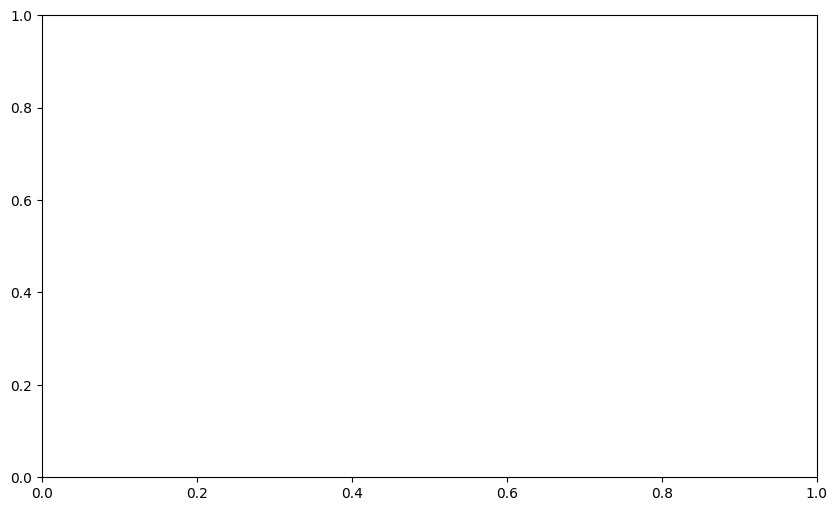

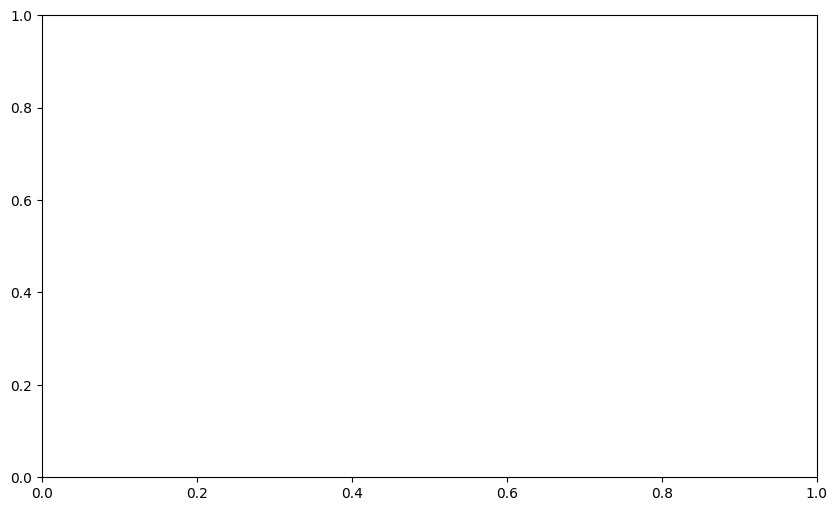

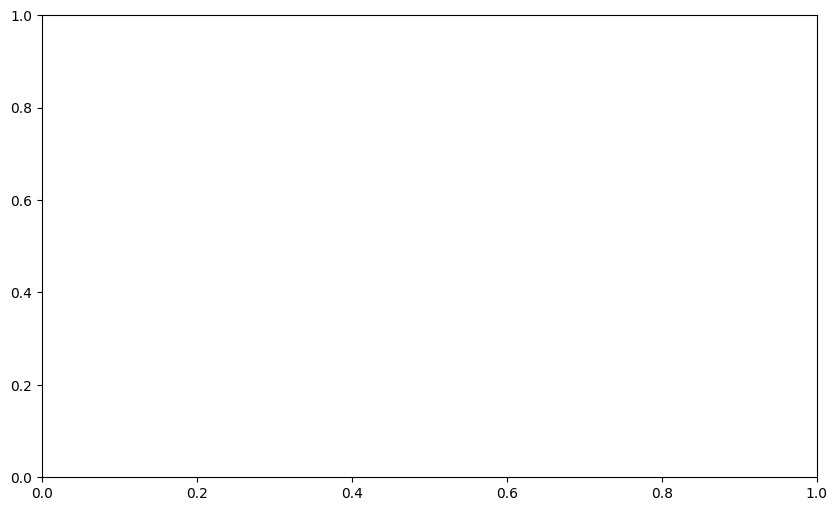

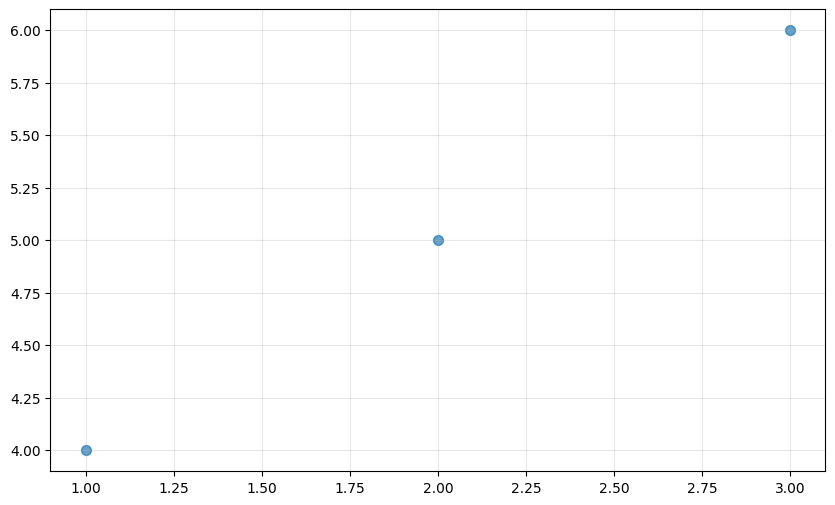

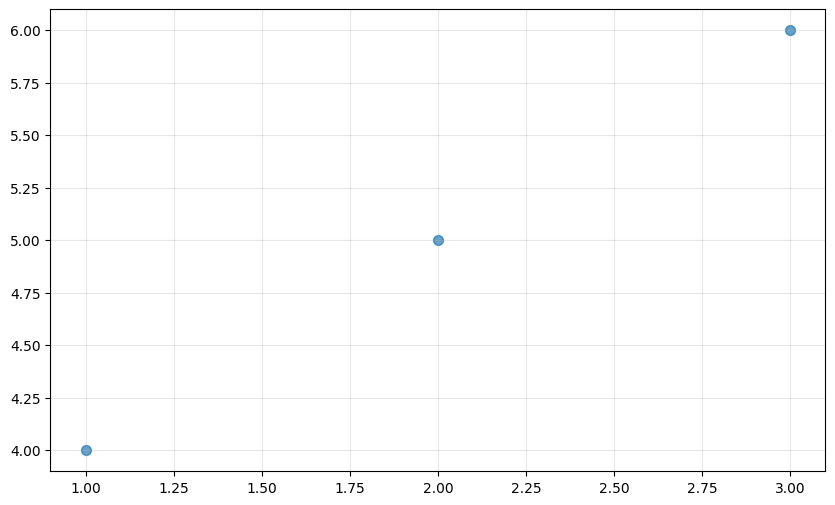

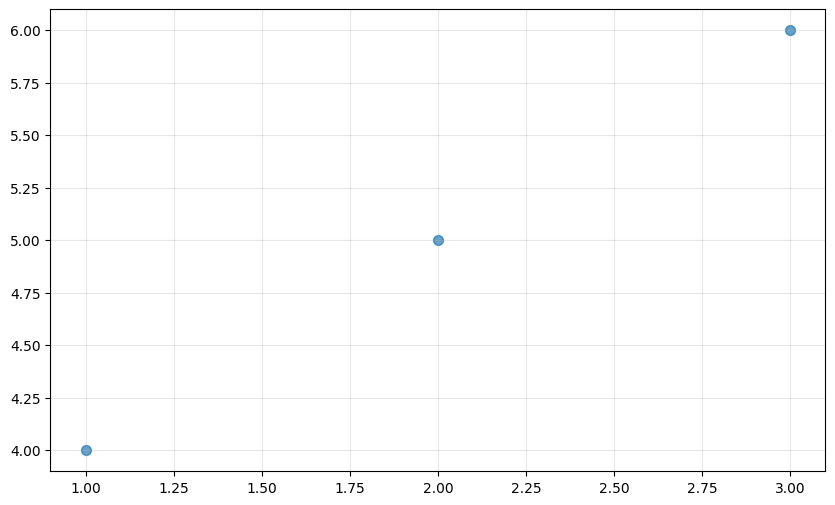

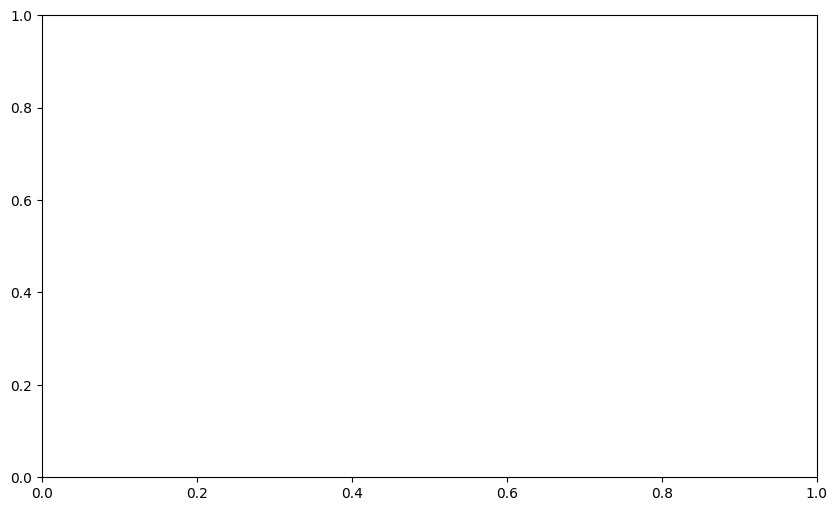

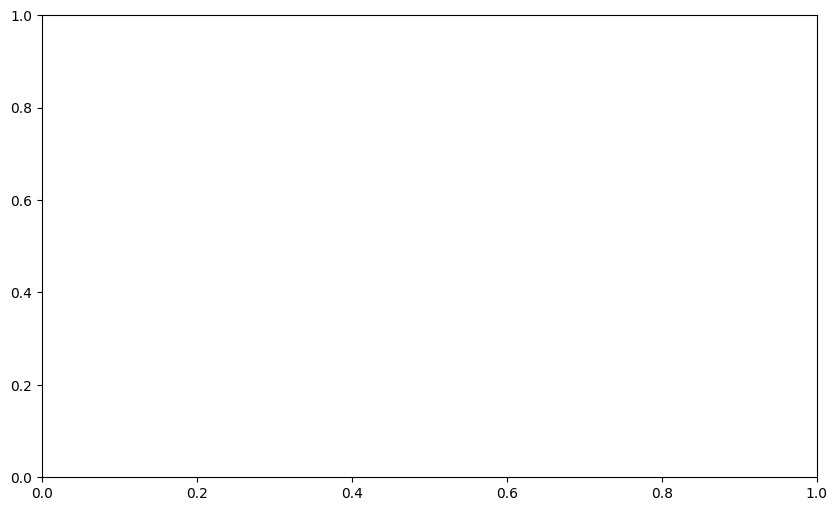

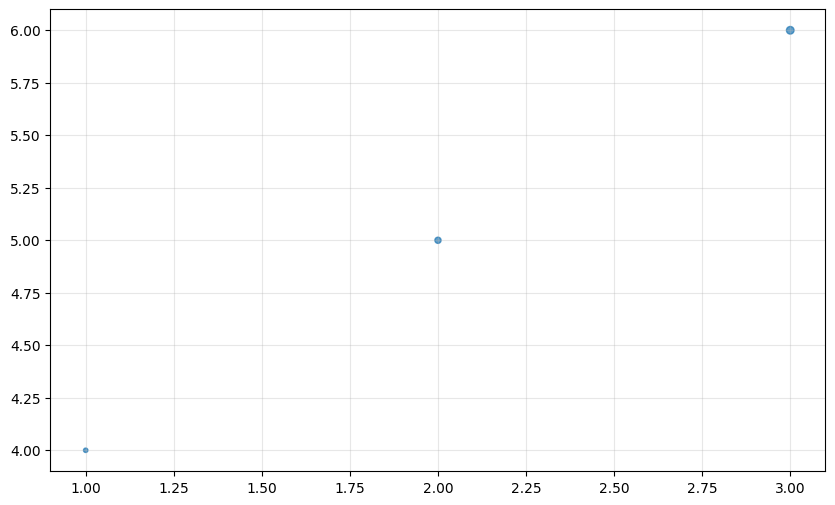

In [86]:
if __name__ == "__main__":
    print("\n")
    print("LightenPlot Error Handling Examples")
    print("=" * 70)
    print()
    
    examples = [
        example_1_basic_error_handling,
        example_2_empty_data_handling,
        example_3_parameter_validation,
        example_4_data_validator,
        example_5_context_manager,
        example_6_suppress_warnings,
        example_7_custom_validation,
        example_8_graceful_degradation,
        example_9_error_reporting,
        example_10_chained_validation
    ]
    
    for example in examples:
        try:
            example()
        except Exception as e:
            print(f"Example failed with unexpected error: {e}")
            print()
    
    print("=" * 70)
    print("All examples completed!")
    print("=" * 70)